# Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Import Datasets from local machine and Concat

In [4]:
# Define the folder where all datasets are stored
data_folder = r"C:\Users\AKIN-JOHNSON\Desktop\Workspace\BlockChain"  # Replace with the actual folder path

# Get a list of all CSV files in the folder
file_names = [file for file in os.listdir(data_folder) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dataframes = []

# Load each dataset and append it to the list
for file in file_names:
    file_path = os.path.join(data_folder, file)  # Get full file path
    df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
    dataframes.append(df)

# Combine all DataFrames into one (you can use pd.concat or pd.merge depending on the requirement)
# Option 1: Concatenate all datasets vertically (stack them on top of each other)
combined_df = pd.concat(dataframes, ignore_index=True)

# Option 2: Merge datasets on a common column (uncomment if merging is needed)
# combined_df = pd.merge(dataframes[0], dataframes[1], on='common_column') # Example for merging two datasets

# View the combined DataFrame
combined_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
37077,2889,XRP,XRP,2021-07-02 23:59:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
37078,2890,XRP,XRP,2021-07-03 23:59:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
37079,2891,XRP,XRP,2021-07-04 23:59:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
37080,2892,XRP,XRP,2021-07-05 23:59:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10


# Data Wrangling

In [6]:
# creating a copy of my dataset
defi = combined_df
defi.sample(10)
# similarly, we can also use
# defi = combined_df.copy()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
11968,2722,Dogecoin,DOGE,2021-05-29 23:59:59,0.317918,0.281793,0.311398,0.303110,2.470711e+09,3.934490e+10
11158,1912,Dogecoin,DOGE,2019-03-11 23:59:59,0.002006,0.001947,0.002001,0.001966,2.021226e+07,2.331588e+08
416,142,Binance Coin,BNB,2017-12-14 23:59:59,3.158740,2.772660,2.773440,3.158740,4.033530e+07,3.127595e+08
25415,98,Solana,SOL,2020-07-17 23:59:59,1.046842,0.801884,0.870761,0.977837,8.973774e+06,1.686462e+07
18055,939,Litecoin,LTC,2015-11-23 23:59:59,3.146720,3.111330,3.143890,3.124100,1.389260e+06,1.352520e+08
19727,2611,Litecoin,LTC,2020-06-21 23:59:59,43.755853,43.027029,43.337344,43.087443,1.362753e+09,2.794826e+09
7133,1052,Chainlink,LINK,2020-08-07 23:59:59,10.188631,9.396869,10.147917,10.063365,1.084342e+09,3.522178e+09
13513,41,Ethereum,ETH,2015-09-17 23:59:59,0.909204,0.831132,0.906865,0.874231,8.979400e+05,6.404622e+07
14201,729,Ethereum,ETH,2017-08-05 23:59:59,256.506989,221.951996,222.852005,256.506989,1.333000e+09,2.406177e+10
3845,2129,Bitcoin,BTC,2019-02-25 23:59:59,3913.707265,3807.002446,3807.002446,3882.696293,9.318796e+09,6.817320e+10


In [7]:
# checking for duplicates
defi.duplicated().sum()

# no duplicates

0

In [8]:
# cecking for missing values
defi.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [9]:
# chcking for datatypes
defi.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [10]:
# correcting some datatypes
defi = defi.astype({'Volume':'int',
                    'Marketcap':'int'})

# checking to see if it has been corrected
defi.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int32
Marketcap      int32
dtype: object

In [11]:
defi.sample(10)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
19271,2155,Litecoin,LTC,2019-03-23 23:59:59,61.707003,59.507808,59.791531,61.348615,2009701790,-2147483648
21542,1435,Monero,XMR,2018-04-26 23:59:59,277.252991,250.210007,258.085999,268.270996,153394000,-2147483648
12030,24,EOS,EOS,2017-07-25 23:59:59,1.893310,1.552210,1.877550,1.648070,42547000,397191785
32514,216,USD Coin,USDC,2019-05-12 23:59:59,1.011861,0.991182,0.995416,0.998353,481377527,326565573
36054,1866,XRP,XRP,2018-09-13 23:59:59,0.284655,0.267846,0.270783,0.280583,311799000,-2147483648
27291,1522,Stellar,XLM,2018-10-05 23:59:59,0.247620,0.240469,0.243500,0.245192,38001100,-2147483648
33981,681,Wrapped Bitcoin,WBTC,2020-12-11 23:59:59,18276.798998,17624.472042,18248.131707,18054.934790,33151714,2095471437
22117,2010,Monero,XMR,2019-11-22 23:59:59,54.952022,48.673292,54.146264,51.266617,158097540,887954798
12050,44,EOS,EOS,2017-08-14 23:59:59,1.667840,1.543710,1.610460,1.658200,39205300,470416145
16279,647,IOTA,MIOTA,2019-03-22 23:59:59,0.323438,0.307998,0.315227,0.311170,26155334,864905630


In [12]:
# dropping columns that are not needed
defi = defi.drop(columns=['SNo','Symbol'],axis=1)
defi.sample(10)

,Name,Date,High,Low,Open,Close,Volume,Marketcap
4097,Bitcoin,2019-11-04 23:59:59,9505.051676,9191.485739,9235.607065,9412.611871,-2147483648,-2147483648
28824,Tether,2016-08-11 23:59:59,0.973424,0.962375,0.973424,0.962375,1162530,6690037
7728,Cosmos,2019-12-01 23:59:59,3.929497,3.657669,3.919437,3.807352,175883739,726017955
4773,Cardano,2017-12-06 23:59:59,0.132855,0.113886,0.126748,0.117839,75688800,-2147483648
8836,Crypto.com Coin,2020-05-22 23:59:59,0.072945,0.068411,0.069257,0.072344,28155605,1201148610
14420,Ethereum,2018-03-12 23:59:59,742.513977,683.268005,724.406006,699.830994,1764999936,-2147483648
31230,TRON,2019-05-22 23:59:59,0.029390,0.027012,0.028856,0.027262,717015280,1817881280
33221,USD Coin,2021-04-18 23:59:59,1.026529,0.999800,1.010572,1.000095,-2147483648,-2147483648
21312,Monero,2017-09-08 23:59:59,132.570999,113.303001,120.275002,118.043999,159066000,1777198082
23707,NEM,2017-12-24 23:59:59,1.044020,0.787298,0.940283,1.044020,98134096,-2147483648


In [13]:
# Convert 'Date' column to datetime with format and handle errors
defi['Date'] = pd.to_datetime(defi['Date'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

# Check for rows with NaT
# print(defi[defi['Date'].isna()])

# Split into separate 'date' and 'time' columns
defi['date'] = defi['Date'].dt.date
defi['time'] = defi['Date'].dt.time

defi['date'] = pd.to_datetime(defi['date'])
# Extract year and month
defi['Year'] = defi['date'].dt.year
defi['Month'] = defi['date'].dt.strftime('%b')

# remove the date column
defi = defi.drop('date', axis=1)
defi

# Drop the original 'Date' column if not needed
defi = defi.drop(columns=['Date','time'], axis=1)

# Output DataFrame
defi

,Name,High,Low,Open,Close,Volume,Marketcap,Year,Month
0,Aave,55.112358,49.787900,52.675035,53.219243,0,89128128,2020,Oct
1,Aave,53.402270,40.734578,53.291969,42.401599,583091,71011441,2020,Oct
2,Aave,42.408314,35.970690,42.399947,40.083976,682834,67130036,2020,Oct
3,Aave,44.902511,36.696057,39.885262,43.764463,1658816,220265142,2020,Oct
4,Aave,47.569533,43.291776,43.764463,46.817744,815537,235632208,2020,Oct
...,...,...,...,...,...,...,...,...,...
37077,XRP,0.667287,0.634726,0.659890,0.656763,2061607207,-2147483648,2021,Jul
37078,XRP,0.683677,0.644653,0.655639,0.672888,1872819597,-2147483648,2021,Jul
37079,XRP,0.707783,0.665802,0.673218,0.694945,1885241526,-2147483648,2021,Jul
37080,XRP,0.695653,0.648492,0.695653,0.654300,2076373187,-2147483648,2021,Jul


In [14]:
# # Extract year and month
# defi['Year'] = defi['date'].dt.year
# defi['Month'] = defi['date'].dt.month

# # remove the date column
# defi = defi.drop('date', axis=1)
# defi

# Exploratory Data Analysis

### Closing trends for major coins 
(BTC, ETH, LIT, TET, DOGE)

In [17]:
# closing trend for Bitcoin
btc = defi[defi['Name'] == 'Bitcoin']
btc
# year_trend = btc.groupby('Year')['Close'].mean()
# year_trend

year_trend = btc.pivot_table(index='Year', values='Close', aggfunc='mean')
year_trend

,Close
Year,
2013,257.973504
2014,527.236459
2015,272.453381
2016,568.492407
2017,4006.033629
2018,7572.298943
2019,7395.246281
2020,11116.378080
2021,45539.275876


In [18]:
# closing trend for Etherium
eth = defi[defi['Name'] == 'Ethereum']
eth
# year_trend = btc.groupby('Year')['Close'].mean()
# year_trend

year_trend = eth.pivot_table(index='Year', values='Close', aggfunc='mean')
year_trend

,Close
Year,
2015,0.930201
2016,9.778040
2017,223.915208
2018,483.507726
2019,181.770138
2020,307.542978
2021,2077.092620


In [19]:
# closing trend for litcoin
lit = defi[defi['Name'] == 'Litecoin']
lit
# year_trend = btc.groupby('Year')['Close'].mean()
# year_trend

year_trend = lit.pivot_table(index='Year', values='Close', aggfunc='mean')
year_trend

,Close
Year,
2013,6.675841
2014,9.845002
2015,2.694571
2016,3.788696
2017,50.032071
2018,105.776156
2019,69.667119
2020,56.243496
2021,197.312047


In [20]:
# closing trend for tether
tet = defi[defi['Name'] == 'Tether']
tet
# year_trend = btc.groupby('Year')['Close'].mean()
# year_trend

year_trend = tet.pivot_table(index='Year', values='Close', aggfunc='mean')
year_trend

,Close
Year,
2015,0.998087
2016,0.999743
2017,0.999716
2018,1.000030
2019,1.004853
2020,1.001316
2021,1.000683


In [21]:
# closing trend for doge coin
doge = defi[defi['Name'] == 'Dogecoin']
doge
# year_trend = btc.groupby('Year')['Close'].mean()
# year_trend

year_trend = doge.pivot_table(index='Year', values='Close', aggfunc='mean')
year_trend

,Close
Year,
2013,0.000501
2014,0.000460
2015,0.000143
2016,0.000235
2017,0.001601
2018,0.004350
2019,0.002563
2020,0.002743
2021,0.179460


### Opening trends for major coins
(BTC, ETH, LIT, TET, DOGE)

In [23]:
# opening trend for Bitcoin
btc = defi[defi['Name'] == 'Bitcoin']
btc
# year_trend = btc.groupby('Year')['Close'].mean()
# year_trend

year_trend = btc.pivot_table(index='Year', values='Open', aggfunc='mean')
year_trend

,Open
Year,
2013,255.633097
2014,528.404704
2015,272.149011
2016,567.141429
2017,3970.644848
2018,7601.018676
2019,7385.218462
2020,11056.787200
2021,45514.300100


In [24]:
# opening trend for Ethereum
eth = defi[defi['Name'] == 'Ethereum']
eth
# year_trend = btc.groupby('Year')['Close'].mean()
# year_trend

year_trend = eth.pivot_table(index='Year', values='Open', aggfunc='mean')
year_trend

,Open
Year,
2015,0.943310
2016,9.763721
2017,221.935485
2018,485.397384
2019,181.771947
2020,305.899434
2021,2068.592976


In [25]:
# opening trend for litcoin
lit = defi[defi['Name'] == 'Litecoin']
lit
# year_trend = btc.groupby('Year')['Close'].mean()
# year_trend

year_trend = lit.pivot_table(index='Year', values='Open', aggfunc='mean')
year_trend

,Open
Year,
2013,6.591748
2014,9.905275
2015,2.693176
2016,3.790774
2017,49.445727
2018,106.353975
2019,69.637864
2020,56.019609
2021,197.309947


In [26]:
# opening trend for tether
tet = defi[defi['Name'] == 'Tether']
tet
# year_trend = btc.groupby('Year')['Close'].mean()
# year_trend

year_trend = tet.pivot_table(index='Year', values='Open', aggfunc='mean')
year_trend

,Open
Year,
2015,0.997983
2016,0.999742
2017,0.999612
2018,0.999976
2019,1.004900
2020,1.001263
2021,1.000681


In [27]:
# opening trend for dogecoin
doge = defi[defi['Name'] == 'Dogecoin']
doge
# year_trend = btc.groupby('Year')['Close'].mean()
# year_trend

year_trend = doge.pivot_table(index='Year', values='Open', aggfunc='mean')
year_trend

,Open
Year,
2013,0.000494
2014,0.000461
2015,0.000143
2016,0.000235
2017,0.001576
2018,0.004368
2019,0.002564
2020,0.002736
2021,0.178109


### Other Analysis

In [29]:
# Which asset has the highest average Volume traded?
highest_volumn = defi.groupby('Name')['Volume'].sum().sort_values(ascending=False)
highest_volumn

Name
TRON                641183831570
Monero              324564337622
Stellar             309816035378
USD Coin            296043233186
Cosmos              221707133564
Chainlink           174565379628
Uniswap             137138280159
Aave                118746380318
XRP                  98961130708
NEM                  90460879214
IOTA                 84181196709
Solana               78890186245
Binance Coin         53141100276
Wrapped Bitcoin      49265632066
Crypto.com Coin      46784388173
Dogecoin            -66246366054
Polkadot            -91838951556
EOS                -109045980376
Cardano            -112869390763
Litecoin          -1058677750831
Ethereum          -1749598450926
Tether            -2466492375263
Bitcoin           -2674415418888
Name: Volume, dtype: int64

In [30]:
# What year has the highest close
highest_close = defi.groupby('Year')['Close'].mean()
highest_close

Year
2013      99.196397
2014     107.255977
2015      34.677986
2016      65.195530
2017     385.328917
2018     546.783355
2019     791.761594
2020    1103.912397
2021    4103.286280
Name: Close, dtype: float64

In [31]:
# What month has the highest open
highest_open = defi.groupby('Month')['Open'].mean()
highest_open

Month
Apr    1450.964711
Aug     631.910566
Dec     810.963417
Feb    1305.865207
Jan    1072.542013
Jul     721.741056
Jun    1140.447500
Mar    1408.358961
May    1333.980548
Nov     668.895192
Oct     556.446400
Sep     577.879140
Name: Open, dtype: float64

In [32]:
# Convert 'Month' to datetime format
defi['Month_datetime'] = pd.to_datetime(defi['Month'], format='%b')

# Group by 'Month' and calculate the mean of 'Open', then sort by 'Month_datetime'
highest_open = defi.groupby('Month')['Open'].mean()

# Sort by the natural datetime order of months
highest_open_sorted = highest_open.sort_index(key=lambda x: pd.to_datetime(x, format='%b'))
highest_open_sorted

Month
Jan    1072.542013
Feb    1305.865207
Mar    1408.358961
Apr    1450.964711
May    1333.980548
Jun    1140.447500
Jul     721.741056
Aug     631.910566
Sep     577.879140
Oct     556.446400
Nov     668.895192
Dec     810.963417
Name: Open, dtype: float64

# Machine Learning

In [34]:
# lets see the dataset im walking with
defi

,Name,High,Low,Open,Close,Volume,Marketcap,Year,Month,Month_datetime
0,Aave,55.112358,49.787900,52.675035,53.219243,0,89128128,2020,Oct,1900-10-01
1,Aave,53.402270,40.734578,53.291969,42.401599,583091,71011441,2020,Oct,1900-10-01
2,Aave,42.408314,35.970690,42.399947,40.083976,682834,67130036,2020,Oct,1900-10-01
3,Aave,44.902511,36.696057,39.885262,43.764463,1658816,220265142,2020,Oct,1900-10-01
4,Aave,47.569533,43.291776,43.764463,46.817744,815537,235632208,2020,Oct,1900-10-01
...,...,...,...,...,...,...,...,...,...,...
37077,XRP,0.667287,0.634726,0.659890,0.656763,2061607207,-2147483648,2021,Jul,1900-07-01
37078,XRP,0.683677,0.644653,0.655639,0.672888,1872819597,-2147483648,2021,Jul,1900-07-01
37079,XRP,0.707783,0.665802,0.673218,0.694945,1885241526,-2147483648,2021,Jul,1900-07-01
37080,XRP,0.695653,0.648492,0.695653,0.654300,2076373187,-2147483648,2021,Jul,1900-07-01


In [35]:
# lets first remove columns that are not needed for me
defi = defi.drop(columns=['Month','Month_datetime','Year'], axis=1)
defi.head(20)

,Name,High,Low,Open,Close,Volume,Marketcap
0,Aave,55.112358,49.787900,52.675035,53.219243,0,89128128
1,Aave,53.402270,40.734578,53.291969,42.401599,583091,71011441
2,Aave,42.408314,35.970690,42.399947,40.083976,682834,67130036
3,Aave,44.902511,36.696057,39.885262,43.764463,1658816,220265142
4,Aave,47.569533,43.291776,43.764463,46.817744,815537,235632208
5,Aave,51.405655,46.703328,46.818146,49.133718,1074627,247288428
6,Aave,51.453374,48.716040,49.133130,49.660726,692150,249940843
7,Aave,54.421418,48.754077,49.661573,52.238692,1354836,262915666
8,Aave,57.481904,49.598735,52.238392,51.124317,1386221,257307050
9,Aave,57.853946,49.629529,51.372899,51.316518,3132405,258274392


In [36]:
# Encode the name column
le = LabelEncoder()
defi['Name'] = le.fit_transform(defi['Name'])
defi

,Name,High,Low,Open,Close,Volume,Marketcap
0,0,55.112358,49.787900,52.675035,53.219243,0,89128128
1,0,53.402270,40.734578,53.291969,42.401599,583091,71011441
2,0,42.408314,35.970690,42.399947,40.083976,682834,67130036
3,0,44.902511,36.696057,39.885262,43.764463,1658816,220265142
4,0,47.569533,43.291776,43.764463,46.817744,815537,235632208
...,...,...,...,...,...,...,...
37077,22,0.667287,0.634726,0.659890,0.656763,2061607207,-2147483648
37078,22,0.683677,0.644653,0.655639,0.672888,1872819597,-2147483648
37079,22,0.707783,0.665802,0.673218,0.694945,1885241526,-2147483648
37080,22,0.695653,0.648492,0.695653,0.654300,2076373187,-2147483648


In [37]:
# split dataset into feature/label and target
X = defi.drop('Close', axis=1)
y = defi['Close']

# split into training and testng
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, shuffle=True)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25957, 6) (25957,)
(11125, 6) (11125,)


### Decision tree

In [39]:
# initialize the model
dtr = DecisionTreeRegressor(random_state=40)

# train the model
dtr.fit(X_train, y_train)

# predict the model
y_test_pred = dtr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
print(f'The Mean Absolute Error is: {mae:.2f}')
print()
print(f'The Mean Squared Error is: {mse:.2f}')    

The Mean Absolute Error is: 15.00

The Mean Squared Error is: 12197.12


In [40]:
# lets use cross validation
cv = cross_val_score(estimator=dtr, X=X, y=y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
mse_scores = -cv

# Calculate the mean and standard deviation of MSE scores
mean_mse = mse_scores.mean()

print(f"Cross-Validation Mean MSE: {mean_mse:.3f}")

Cross-Validation Mean MSE: 13970.570


### Visualization

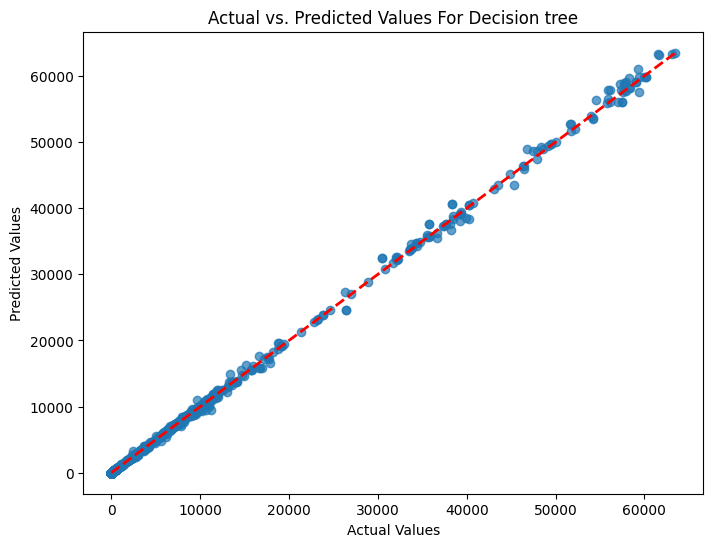

In [42]:
# Actual vs. Predicted Scatter Plot

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values For Decision tree')
plt.show()

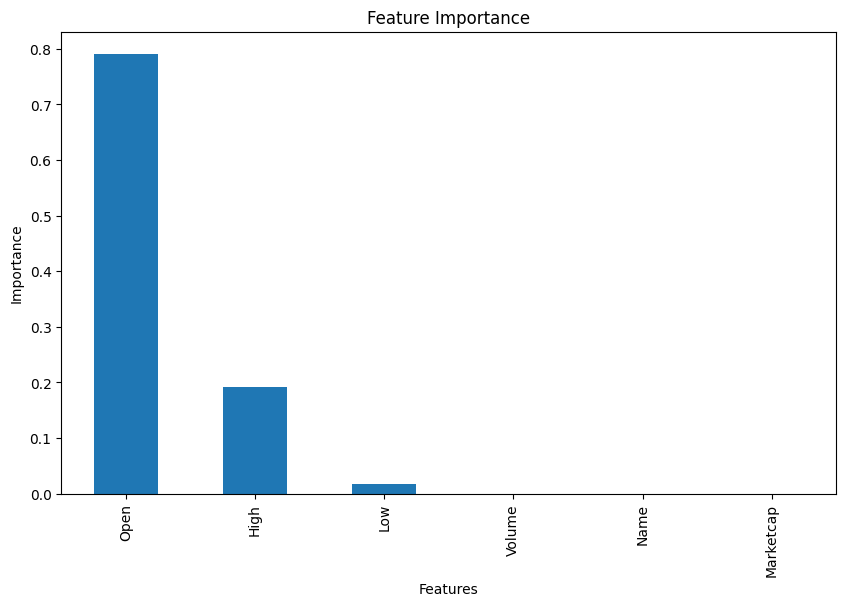

In [43]:
# Feature importance
feature_importance = pd.Series(dtr.feature_importances_, index=X_train.columns)

plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Random forest

In [45]:
# initialize the model
rfr = RandomForestRegressor(random_state=40)

# train the model
rfr.fit(X_train, y_train)

# predict the model
y_test_pred = rfr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
print(f'The Mean Absolute Error is: {mae:.2f}')
print()
print(f'The Mean Squared Error is: {mse:.2f}')    

The Mean Absolute Error is: 13.63

The Mean Squared Error is: 9654.47


In [46]:
# lets use cross validation
cv = cross_val_score(estimator=rfr, X=X, y=y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
mse_scores = -cv

# Calculate the mean and standard deviation of MSE scores
mean_mse = mse_scores.mean()

print(f"Cross-Validation Mean MSE: {mean_mse:.3f}")

Cross-Validation Mean MSE: 9474.921


### Visualization

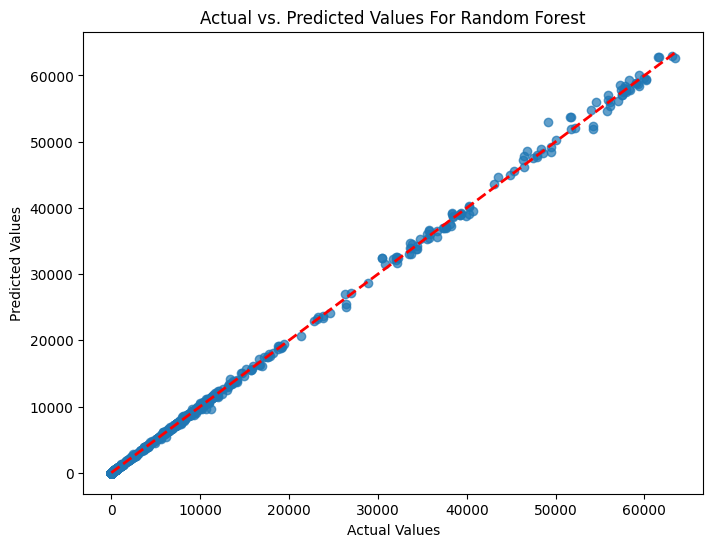

In [48]:
# Actual vs. Predicted Scatter Plot

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values For Random Forest')
plt.show()

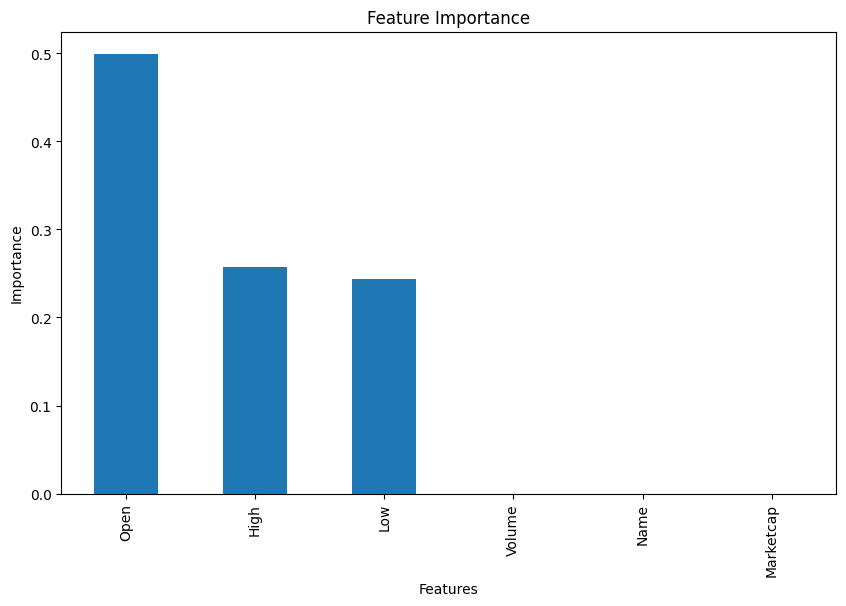

In [49]:
# Feature importance
feature_importance = pd.Series(rfr.feature_importances_, index=X_train.columns)

plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()